# Analyse des données de Demandes de Valeurs Foncières (DVF)

## Importation des modules

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [2]:
url = 'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20240408-125738/valeursfoncieres-2023.txt'
df = pd.read_csv(url, sep='|', low_memory=False).dropna(axis=1, how='all')
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,"1070000,00",184.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,2.0,Appartement,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,"152200,00",2914.0,NaN,RTE,0107,DE PONCIN,1450.0,...,NaN,NaN,0,1.0,Maison,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,"269000,00",427.0,T,CHE,0040,DE L'AUBEPIN,1800.0,...,NaN,NaN,0,1.0,Maison,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,"98250,00",66.0,B,RUE,8892,SEBASTIEN MERCIER,75015.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [80]:
# On prend le département des Cotes d'Armor
df1 = df[df['Code departement'] == '75']

# Dates = pd.to_datetime(df1['Date mutation'], dayfirst=True)

df1_cleaned = df1.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'No disposition'], axis=1)
df1_cleaned.isnull().sum()

Date mutation                    0
Nature mutation                  0
Valeur fonciere                563
No voie                        205
Type de voie                   241
Code postal                    202
Code departement                 0
Code commune                     0
Prefixe de section           80420
Section                          0
No plan                          0
Code type local                804
Surface reelle bati            811
Nombre pieces principales      811
Nature culture               73224
Nature culture speciale      80420
Surface terrain              73224
dtype: int64

In [81]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3646585,03/01/2023,Vente,"1825000,00",89.0,RUE,75001.0,75,101,NaN,AP,50,4.0,165.0,0.0,NaN,NaN,NaN
3646586,05/01/2023,Vente,"567000,00",51.0,RUE,75010.0,75,110,NaN,AV,75,4.0,52.0,0.0,NaN,NaN,NaN
3646587,04/01/2023,Vente,"140000,00",178.0,RUE,75017.0,75,117,NaN,BG,53,2.0,18.0,1.0,NaN,NaN,NaN
3646588,05/01/2023,Vente,"400000,00",12.0,RUE,75009.0,75,109,NaN,BD,36,2.0,43.0,1.0,NaN,NaN,NaN
3646589,04/01/2023,Vente,"141343,12",63.0,RUE,75018.0,75,118,NaN,AK,14,3.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727001,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727002,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,4,3.0,0.0,0.0,NaN,NaN,NaN
3727003,28/12/2023,Vente,"98250,00",66.0,RUE,75015.0,75,115,NaN,FV,100,3.0,0.0,0.0,NaN,NaN,NaN


### Numérisation des données

## Numérisation des données

In [82]:
df1_cleaned['Valeur fonciere'] = df1_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)


df1_cleaned['Type de voie'] = df1_cleaned['Type de voie'].astype("category").cat.codes
df1_cleaned['Nature mutation'] = df1_cleaned["Nature mutation"].astype("category").cat.codes
df1_cleaned['Nature culture'] = df1_cleaned["Nature culture"].astype("category").cat.codes

df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].astype("category").cat.codes

df1_cleaned['Section'] = df1_cleaned['Section'].astype("category").cat.codes
df1_cleaned['Code type local'] = df1_cleaned['Code type local'].astype("category").cat.codes
df1_cleaned['No voie'] = df1_cleaned['No voie'].astype("category").cat.codes

df1_cleaned.loc[df1_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df1_cleaned.loc[df1_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df1_cleaned['Code departement'] = df1_cleaned['Code departement'].astype(int)

df1_cleaned['Prefixe de section'] = df1_cleaned['Prefixe de section'].fillna(0).astype(int)

df1_cleaned['Surface Totale'] = df1_cleaned['Surface reelle bati'] + df1_cleaned['Surface terrain']


```python
df1_cleaned['Prefixe de section'] = df["Prefixe de section"].fillna(0)
df1_cleaned['reference_cadastral'] = (
    df1_cleaned['Code departement'].apply(lambda x: str(x).zfill(3)) + " " +
    # df1_cleaned['Code commune'].apply(lambda x: str(x).zfill(3)) + " " + 
    df1_cleaned['Prefixe de section'].apply(lambda x: str(int(x)).zfill(3)) + " " +
    df1_cleaned['Section'].apply(lambda x : str(x).ljust(2, "0")) + " " )
    # df['No plan'].apply(lambda x: str(x).zfill(3)))
```

In [83]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646585,03/01/2023,3,1825000.00,88,17,75001.0,75,101,0,15,50,3,165.0,0.0,-1,0,NaN,NaN
3646586,05/01/2023,3,567000.00,50,17,75010.0,75,110,0,21,75,3,52.0,0.0,-1,0,NaN,NaN
3646587,04/01/2023,3,140000.00,177,17,75017.0,75,117,0,32,53,1,18.0,1.0,-1,0,NaN,NaN
3646588,05/01/2023,3,400000.00,11,17,75009.0,75,109,0,29,36,1,43.0,1.0,-1,0,NaN,NaN
3646589,04/01/2023,3,141343.12,62,17,75018.0,75,118,0,10,14,2,0.0,0.0,-1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727001,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727002,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,0.0,-1,0,NaN,NaN
3727003,28/12/2023,3,98250.00,65,17,75015.0,75,115,0,150,100,2,0.0,0.0,-1,0,NaN,NaN


In [84]:
df1_cleaned.isnull().sum()

Date mutation                    0
Nature mutation                  0
Valeur fonciere                563
No voie                          0
Type de voie                     0
Code postal                    202
Code departement                 0
Code commune                     0
Prefixe de section               0
Section                          0
No plan                          0
Code type local                  0
Surface reelle bati            811
Nombre pieces principales      811
Nature culture                   0
Nature culture speciale          0
Surface terrain              73224
Surface Totale               73289
dtype: int64

In [85]:
df1_cleaned = df1_cleaned.dropna()
df1_cleaned.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Surface reelle bati          0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface terrain              0
Surface Totale               0
dtype: int64

In [86]:
df1_cleaned = df1_cleaned.drop_duplicates()
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646723,06/01/2023,3,430000.0,117,17,75019.0,75,119,0,85,124,0,18.0,1.0,3,0,28.0,46.0
3646805,04/01/2023,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,150.0,0.0,3,0,454.0,604.0
3646806,04/01/2023,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,203.0,0.0,3,0,454.0,657.0
3646807,04/01/2023,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,16.0,0.0,3,0,454.0,470.0
3646808,04/01/2023,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,84.0,0.0,3,0,454.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726948,15/12/2023,3,47000000.0,2,17,75006.0,75,106,0,33,95,3,239.0,0.0,3,0,625.0,864.0
3726949,15/12/2023,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,239.0,8.0,3,0,625.0,864.0
3726950,15/12/2023,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,39.0,3.0,3,0,625.0,664.0
3726951,15/12/2023,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,154.0,5.0,3,0,625.0,779.0


In [87]:
Dates = pd.to_datetime(df1_cleaned['Date mutation'], dayfirst=True)
df1_cleaned_with_dates = df1_cleaned.copy(deep=True)
df1_cleaned = df1_cleaned.drop('Date mutation', axis=1)
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3646723,3,430000.0,117,17,75019.0,75,119,0,85,124,0,18.0,1.0,3,0,28.0,46.0
3646805,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,150.0,0.0,3,0,454.0,604.0
3646806,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,203.0,0.0,3,0,454.0,657.0
3646807,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,16.0,0.0,3,0,454.0,470.0
3646808,4,762000000.0,11,17,75001.0,75,101,0,24,26,3,84.0,0.0,3,0,454.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726948,3,47000000.0,2,17,75006.0,75,106,0,33,95,3,239.0,0.0,3,0,625.0,864.0
3726949,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,239.0,8.0,3,0,625.0,864.0
3726950,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,39.0,3.0,3,0,625.0,664.0
3726951,3,47000000.0,2,17,75006.0,75,106,0,33,95,1,154.0,5.0,3,0,625.0,779.0


In [88]:
Dates

3646723   2023-01-06
3646805   2023-01-04
3646806   2023-01-04
3646807   2023-01-04
3646808   2023-01-04
             ...    
3726948   2023-12-15
3726949   2023-12-15
3726950   2023-12-15
3726951   2023-12-15
3726952   2023-12-15
Name: Date mutation, Length: 2518, dtype: datetime64[ns]

In [53]:
# TODO : trouver un groupby adapté

## Visualisation des données

### Matrice de corrélation

In [89]:
# Matrice de corrélation
correlation_matrix = df1_cleaned.corr()
correlation_matrix

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
Nature mutation,1.000000,0.666744,-0.035927,0.015818,-0.128088,NaN,-0.128088,NaN,-0.044323,-0.069245,0.039622,0.045264,-0.025719,0.001302,NaN,0.070559,0.081225
Valeur fonciere,0.666744,1.000000,-0.073887,0.043683,-0.283433,NaN,-0.283433,NaN,-0.079428,-0.113346,0.133542,0.092009,-0.056311,-0.001329,NaN,0.129851,0.154170
No voie,-0.035927,-0.073887,1.000000,-0.175262,0.110872,NaN,0.110872,NaN,0.100144,-0.030980,-0.002730,-0.006570,-0.028304,0.004893,NaN,0.109679,0.084832
Type de voie,0.015818,0.043683,-0.175262,1.000000,-0.025833,NaN,-0.025833,NaN,0.049588,0.012677,-0.042624,-0.073211,-0.015470,0.049777,NaN,-0.000828,-0.040091
Code postal,-0.128088,-0.283433,0.110872,-0.025833,1.000000,NaN,1.000000,NaN,0.553062,0.083025,-0.244191,-0.008039,0.172957,-0.017107,NaN,0.102573,0.078315
Code departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code commune,-0.128088,-0.283433,0.110872,-0.025833,1.000000,NaN,1.000000,NaN,0.553062,0.083025,-0.244191,-0.008039,0.172957,-0.017107,NaN,0.102573,0.078315
Prefixe de section,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,-0.044323,-0.079428,0.100144,0.049588,0.553062,NaN,0.553062,NaN,1.000000,0.115327,-0.216690,0.013579,0.182440,-0.060554,NaN,0.194498,0.164022
No plan,-0.069245,-0.113346,-0.030980,0.012677,0.083025,NaN,0.083025,NaN,0.115327,1.000000,-0.137157,-0.036466,0.089768,0.016502,NaN,-0.103725,-0.103210


In [90]:
correlation_matrix.isnull().sum()

Nature mutation               3
Valeur fonciere               3
No voie                       3
Type de voie                  3
Code postal                   3
Code departement             17
Code commune                  3
Prefixe de section           17
Section                       3
No plan                       3
Code type local               3
Surface reelle bati           3
Nombre pieces principales     3
Nature culture                3
Nature culture speciale      17
Surface terrain               3
Surface Totale                3
dtype: int64

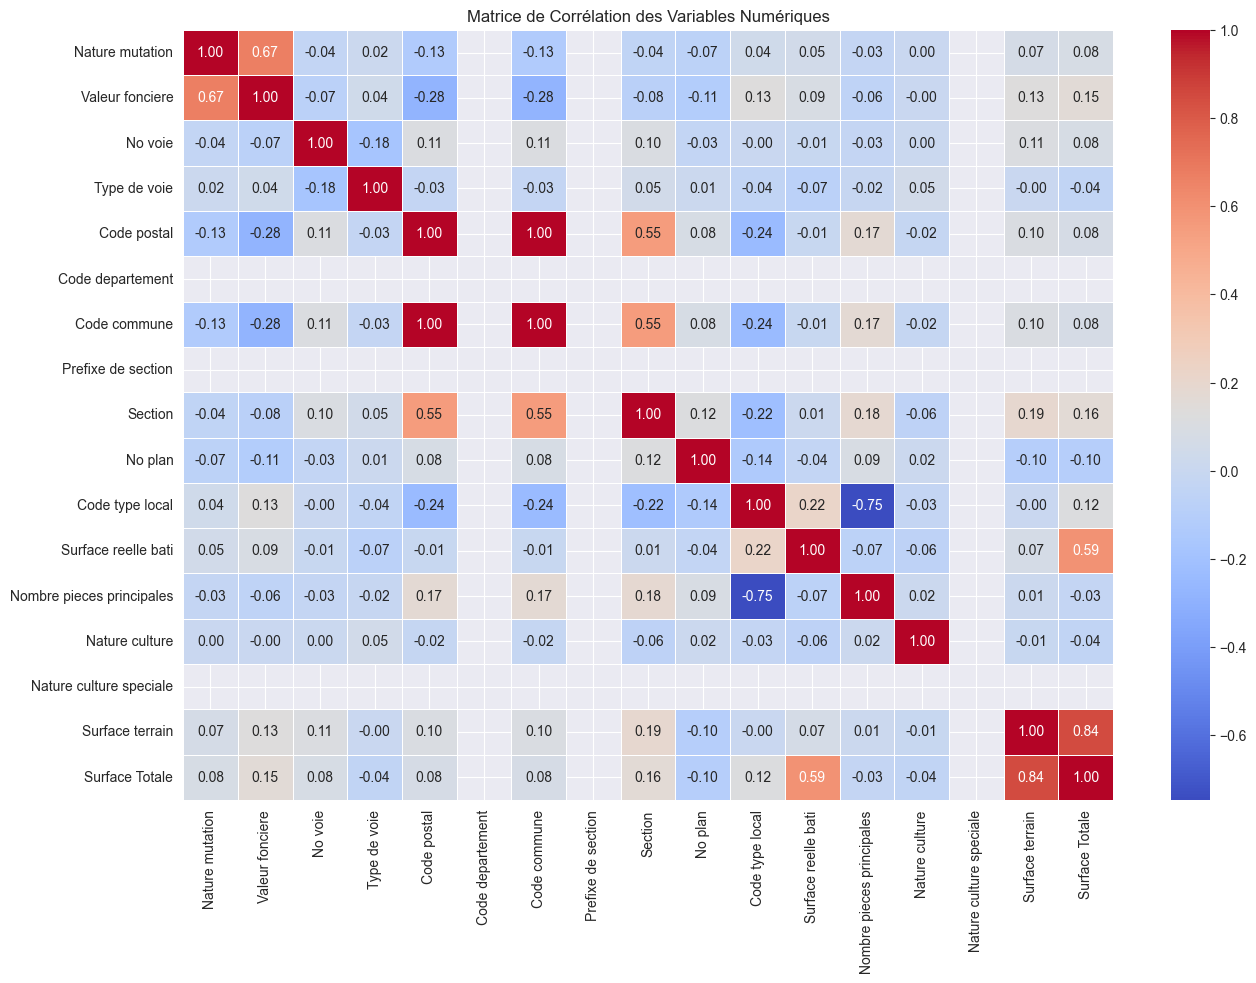

In [91]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

### Date mutation VS Valeur foncière

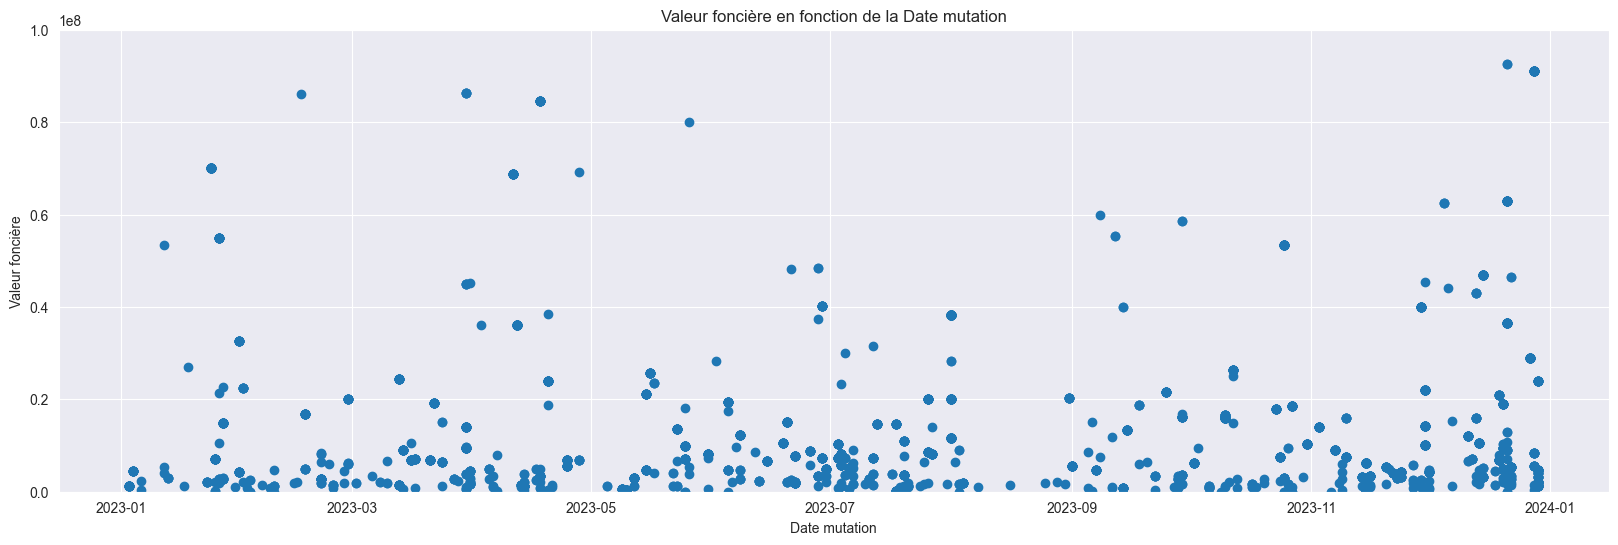

In [75]:
plt.figure(figsize=(20, 6))
plt.scatter(Dates, df1_cleaned['Valeur fonciere'])
plt.ylim(0, 100000000)
plt.xlabel('Date mutation')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Date mutation')
plt.show()

On observe un légère tendance à la hausse de la valeur foncière en fonction de la date de mutation, mais cela n'est pas très significatif.

### Valeur foncière VS Surface Totale

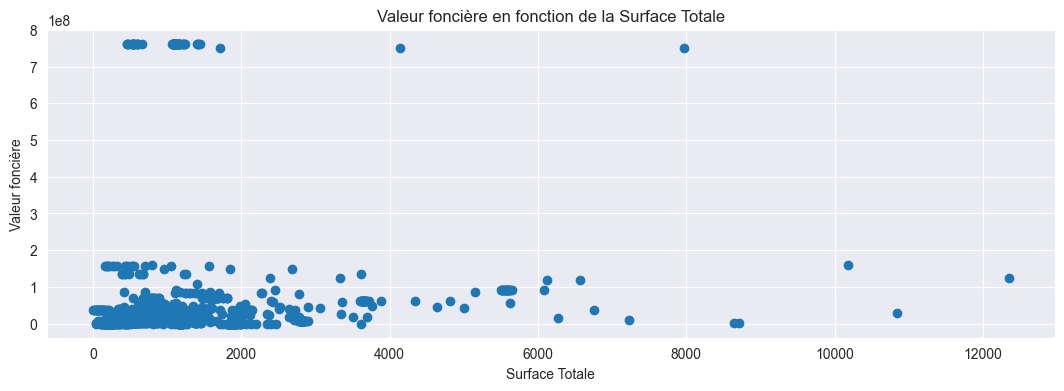

In [77]:
plt.figure(figsize=(13, 4))
plt.scatter(df1_cleaned['Surface Totale'], df1_cleaned['Valeur fonciere'])
plt.xlabel('Surface Totale')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Surface Totale')
plt.show()

# TODO : Ajouter une régression linéaire

### Code département VS Valeur foncière

On utilise la moyenne de la valeur foncière pour chaque code département. Cela permet d'annuler l'effet des vlaleurs extrêmes.

In [14]:
df1_cleaned['Code postal']

3646723    75019.0
3646805    75001.0
3646806    75001.0
3646807    75001.0
3646808    75001.0
            ...   
3726948    75006.0
3726949    75006.0
3726950    75006.0
3726951    75006.0
3726952    75006.0
Name: Code postal, Length: 2491, dtype: float64

In [15]:
means_valeur_fonciere = df1_cleaned.groupby('Code postal')['Valeur fonciere'].mean()

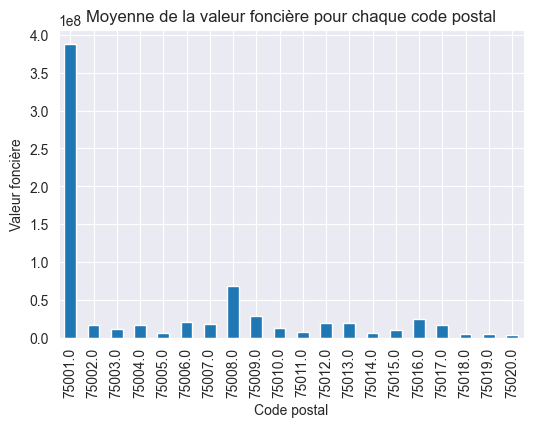

In [16]:
# Moyenen de la valeur foncière pour chaque arrondissement de Paris
plt.figure(figsize=(6, 4))
means_valeur_fonciere.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncière')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

On observe des une valeur foncière moyenne annormalement élevé pour le 1er arrondissement de Paris. Cela est dû à des valeurs extrêmes. On va donc supprimer ces valeurs extrêmes pour mieux visualiser.

In [17]:
# Suppression des valeurs extrêmes
df1_cleaned_without_extrem = df1_cleaned[df1_cleaned['Valeur fonciere'] < 700000000]
means_valeur_fonciere_without_extrem = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean()
means_valeur_fonciere_without_extrem

Code postal
75001.0    1.321077e+07
75002.0    1.709790e+07
75003.0    1.126930e+07
75004.0    1.627094e+07
75005.0    5.737424e+06
75006.0    2.096031e+07
75007.0    1.736222e+07
75008.0    5.506807e+07
75009.0    2.833720e+07
75010.0    1.318777e+07
75011.0    7.595483e+06
75012.0    1.911754e+07
75013.0    1.870470e+07
75014.0    6.112568e+06
75015.0    9.863297e+06
75016.0    2.465509e+07
75017.0    1.694468e+07
75018.0    4.864303e+06
75019.0    4.857773e+06
75020.0    3.910545e+06
Name: Valeur fonciere, dtype: float64

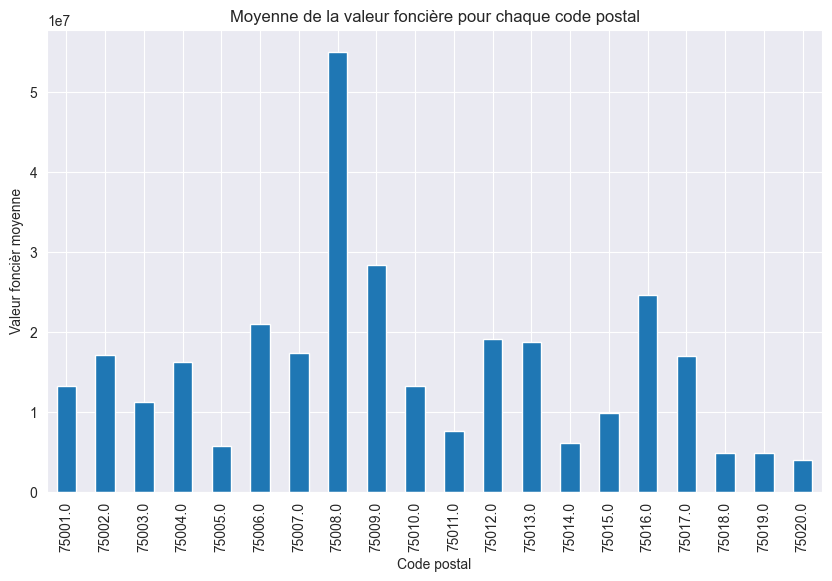

In [18]:
plt.figure(figsize=(10, 6))
means_valeur_fonciere_without_extrem.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncièr moyenne')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

### Pairplot

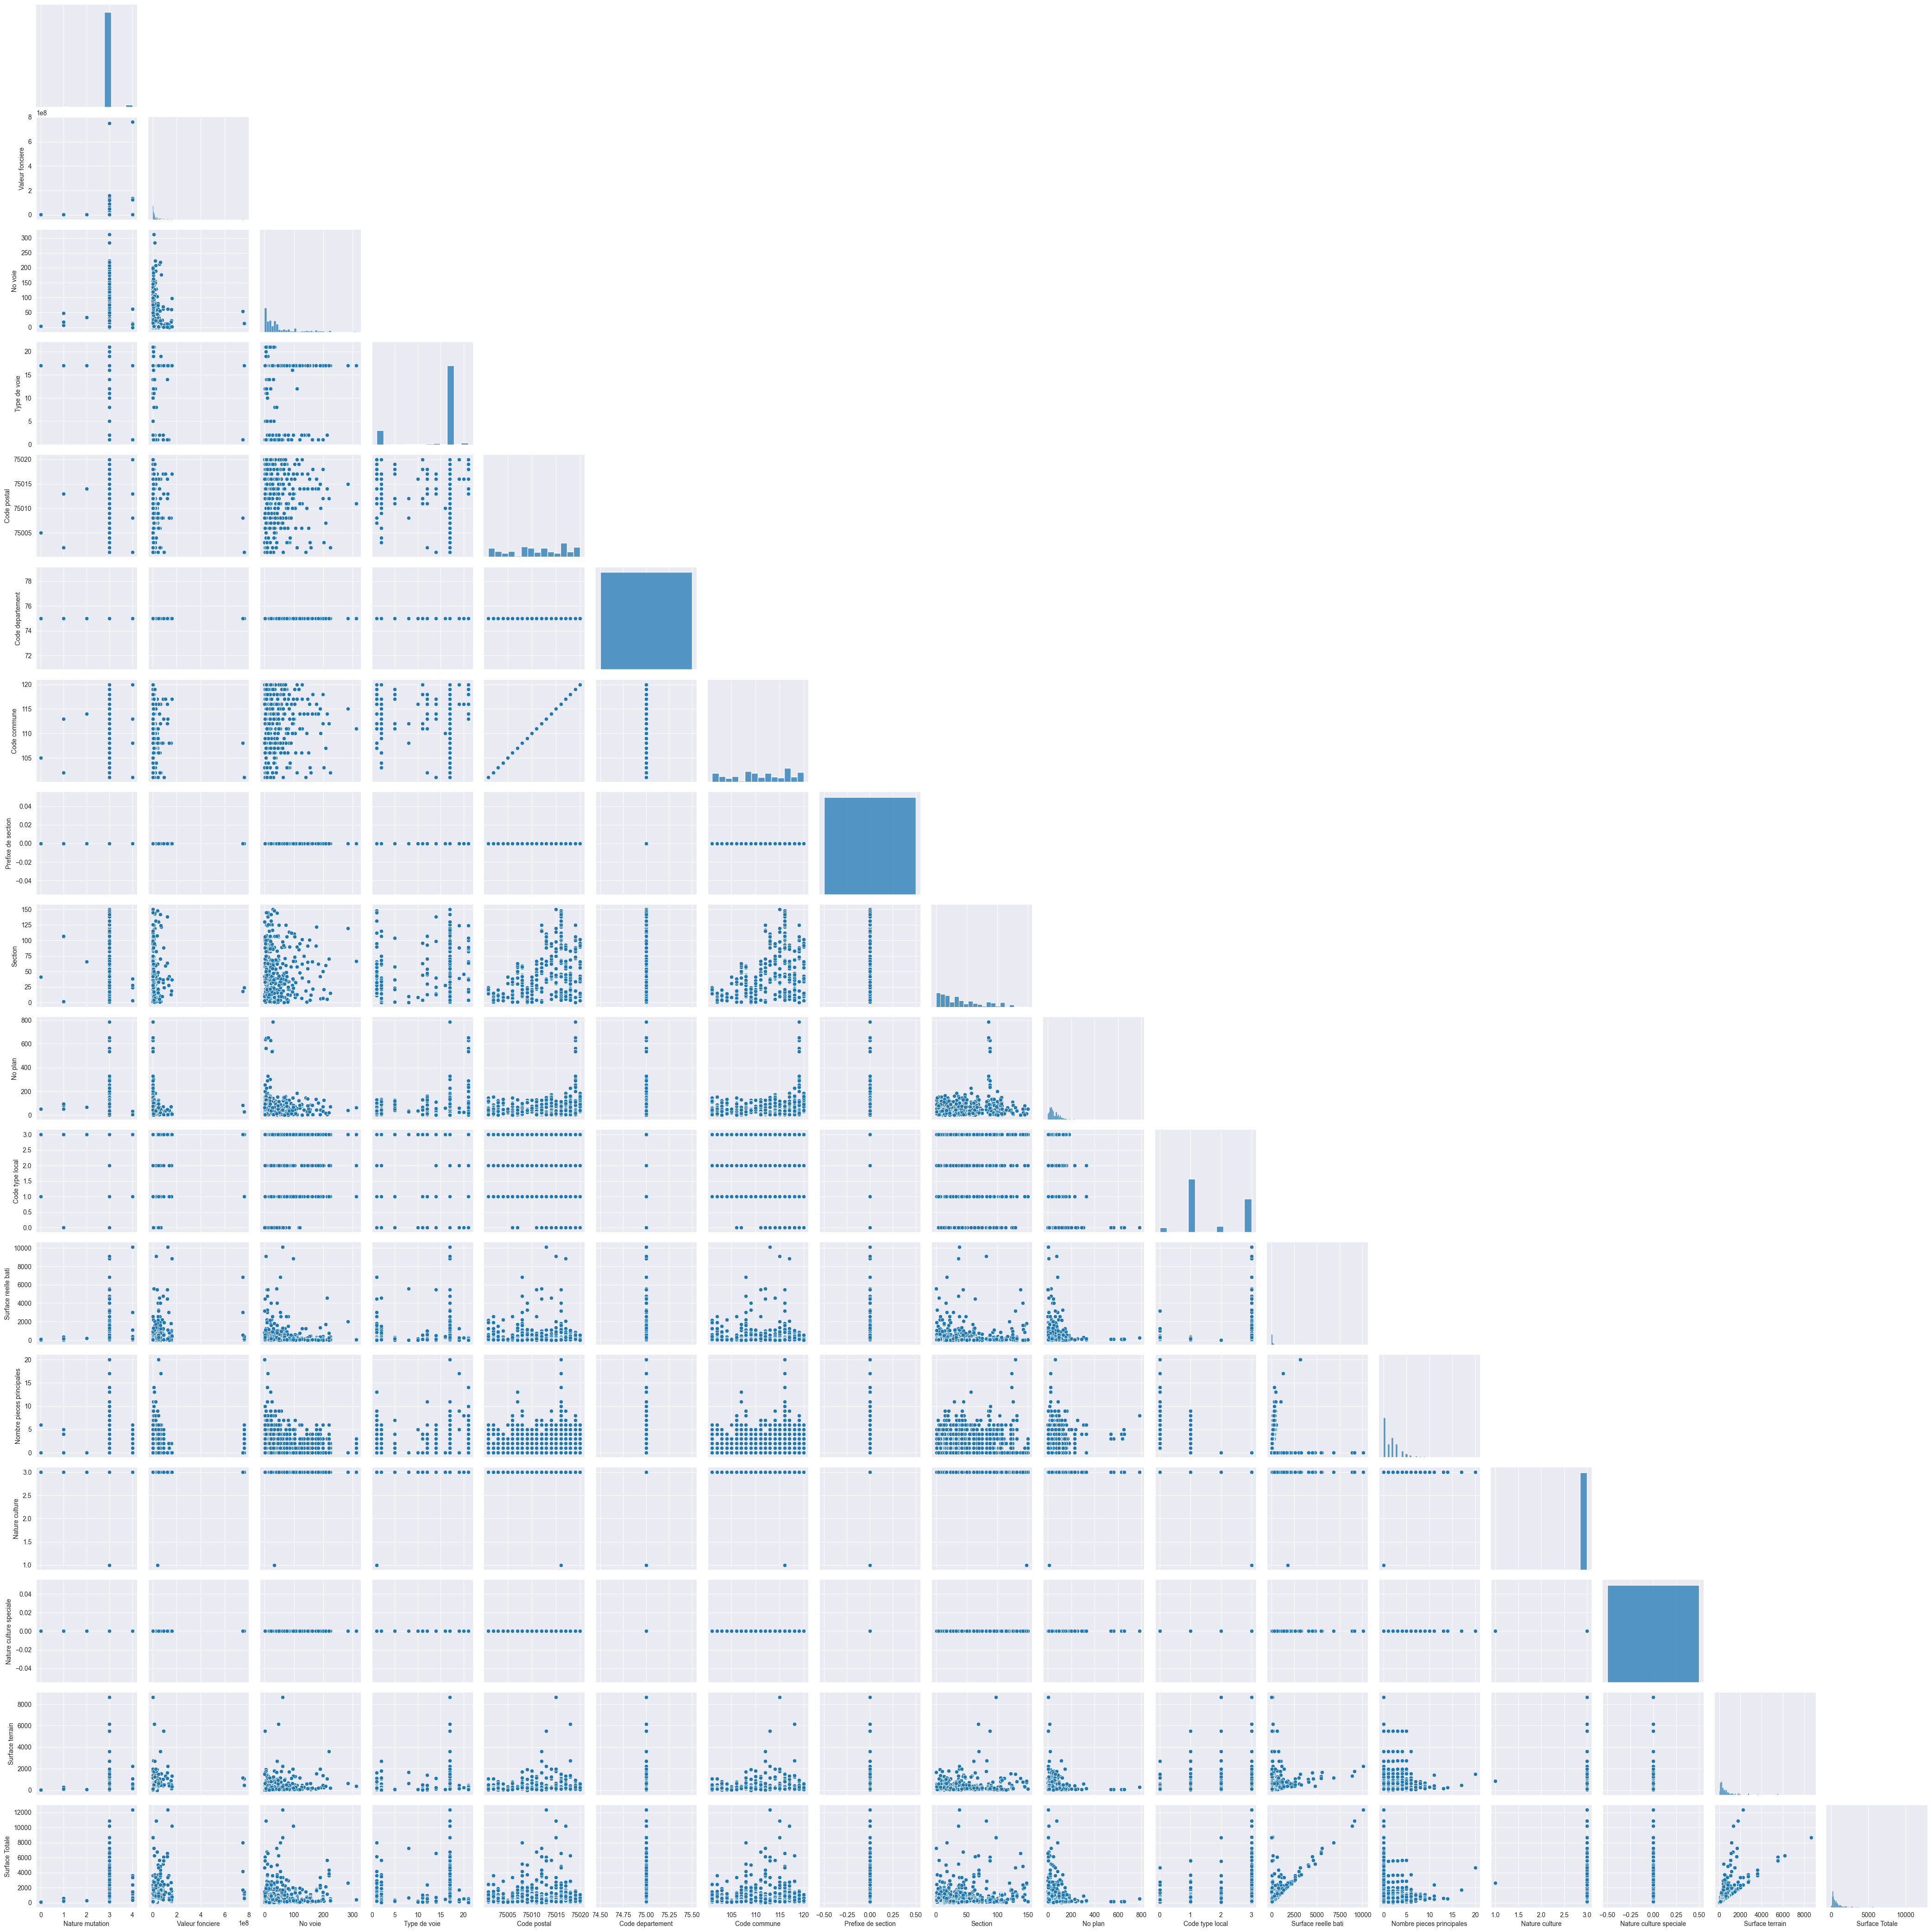

In [19]:
pairplot = sns.pairplot(df1_cleaned, corner=True)
plt.show(pairplot)

## [Géomap](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b) des valeurs foncières

### Import des modules

In [177]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [178]:
means_valeur_fonciere_without_extrem # on garde la moyenne par département réalisé précédemment

Code postal
75001.0    1.321077e+07
75002.0    1.709790e+07
75003.0    1.126930e+07
75004.0    1.627094e+07
75005.0    5.737424e+06
75006.0    2.096031e+07
75007.0    1.736222e+07
75008.0    5.506807e+07
75009.0    2.833720e+07
75010.0    1.318777e+07
75011.0    7.595483e+06
75012.0    1.911754e+07
75013.0    1.870470e+07
75014.0    6.112568e+06
75015.0    9.863297e+06
75016.0    2.465509e+07
75017.0    1.694468e+07
75018.0    4.864303e+06
75019.0    4.857773e+06
75020.0    3.910545e+06
Name: Valeur fonciere, dtype: float64

In [179]:
# On récupère  les données géographiques des arrondissements de Paris
path = './map_Paris/arrondissements.shp'

paris = gpd.read_file(path)
# paris_shape = paris.to_crs({'init': 'epsg:4326'})

In [180]:
paris

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geometry
0,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"POLYGON ((2.29517 48.87396, 2.29504 48.87378, ..."
1,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"POLYGON ((2.36383 48.86750, 2.36389 48.86747, ..."
3,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"POLYGON ((2.33381 48.84061, 2.33673 48.83965, ..."
4,750000019,19,75119,19ème Ardt,Buttes-Chaumont,750001537,6.792651e+06,11253.182479,"POLYGON ((2.38943 48.90122, 2.39014 48.90108, ..."
5,750000013,13,75113,13ème Ardt,Gobelins,750001537,7.149311e+06,11546.546526,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
6,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."
7,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"POLYGON ((2.36851 48.85573, 2.36900 48.85374, ..."
8,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"POLYGON ((2.36469 48.88437, 2.36485 48.88436, ..."
9,750000018,18,75118,18ème Ardt,Buttes-Montmartre,750001537,5.996051e+06,9916.464176,"POLYGON ((2.36580 48.88554, 2.36469 48.88437, ..."


<Axes: >

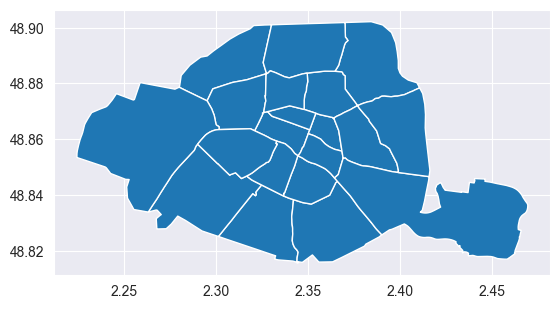

In [181]:
paris.plot()

In [ ]:
# TODO : Trouver un moyen de faire une heatmap des valeurs foncières sur la carte de Paris

## Apprentissage non supervisé KMeans avec PCA

1. Import des module

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. Récupération des variables caractéristiques et de la variable cible

In [259]:
df1_cleaned_with_dates['Date mutation'] = Dates
# drop des ligne avec des valeurs foncières extrêmes et prendre que type local appartement (2)
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Code type local'] == 2]
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Valeur fonciere'] < 700000000]
df1_cleaned_with_dates['Date mutation'] = df1_cleaned_with_dates['Date mutation'].apply(lambda x: x.toordinal())
df1_cleaned_with_dates

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3647244,738524,3,4560000.0,35,17,75010.0,75,110,0,18,79,2,0.0,0.0,3,0,96.0,96.0
3648090,738523,3,1342222.2,104,17,75019.0,75,119,0,8,12,2,0.0,0.0,3,0,516.0,516.0
3649089,738545,3,211050.0,84,17,75008.0,75,108,0,34,11,2,0.0,0.0,3,0,1719.0,1719.0
3649129,738551,3,4315000.0,24,1,75019.0,75,119,0,19,24,2,0.0,0.0,3,0,416.0,416.0
3649343,738560,3,11600.0,8,17,75019.0,75,119,0,0,18,2,0.0,0.0,3,0,144.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726765,738883,3,24000000.0,22,1,75016.0,75,116,0,132,36,2,0.0,0.0,3,0,802.0,802.0
3726823,738876,3,5400000.0,182,1,75014.0,75,114,0,62,101,2,0.0,0.0,3,0,191.0,191.0
3726890,738883,3,1153200.0,76,17,75016.0,75,116,0,42,74,2,0.0,0.0,3,0,115.0,115.0
3726917,738869,3,47000000.0,4,17,75006.0,75,106,0,33,94,2,0.0,0.0,3,0,747.0,747.0


In [260]:
df1_cleaned_Xy = df1_cleaned_with_dates[['Surface Totale', 'Code postal', 'Date mutation', 'Valeur fonciere']]

# Drop des ligne avec une surface totale à 0
df1_cleaned_Xy = df1_cleaned_Xy.drop(df1_cleaned_Xy[df1_cleaned_Xy['Surface Totale'] == 0].index)

df1_cleaned_Xy['Prix/m2'] = df1_cleaned_Xy['Valeur fonciere'] / df1_cleaned_Xy['Surface Totale']
df1_cleaned_Xy = df1_cleaned_Xy.drop('Valeur fonciere', axis=1)

df1_cleaned_Xy

,Surface Totale,Code postal,Date mutation,Prix/m2
3647244,96.0,75010.0,738524,47500.000000
3648090,516.0,75019.0,738523,2601.205814
3649089,1719.0,75008.0,738545,122.774869
3649129,416.0,75019.0,738551,10372.596154
3649343,144.0,75019.0,738560,80.555556
...,...,...,...,...
3726765,802.0,75016.0,738883,29925.187032
3726823,191.0,75014.0,738876,28272.251309
3726890,115.0,75016.0,738883,10027.826087
3726917,747.0,75006.0,738869,62918.340027


3. Standardisation des données

In [261]:
scaler = StandardScaler()
scaler.fit(df1_cleaned_Xy)
df1_cleaned_scaled = scaler.transform(df1_cleaned_Xy)
df1_cleaned_scaled

array([[-4.75505883e-01, -3.69286473e-01, -1.87528777e+00,
         1.70268175e-01],
       [-1.70790580e-02,  1.33064208e+00, -1.88439990e+00,
        -3.91582850e-01],
       [ 1.29598635e+00, -7.47048372e-01, -1.68393307e+00,
        -4.22597245e-01],
       [-1.26228302e-01,  1.33064208e+00, -1.62926030e+00,
        -2.94333832e-01],
       [-4.23114246e-01,  1.33064208e+00, -1.54725114e+00,
        -4.23125566e-01],
       [-4.52584541e-01,  1.51952303e+00, -1.54725114e+00,
        -2.85092261e-01],
       [-2.60481872e-01,  1.14176113e+00, -1.43790559e+00,
        -3.08819455e-01],
       [-4.42761110e-01, -7.47048372e-01, -1.47435411e+00,
         7.24426506e-02],
       [-3.98009919e-01, -7.47048372e-01, -1.29211153e+00,
         1.13552501e+01],
       [ 1.41187346e-01,  9.52880177e-01, -1.47435411e+00,
        -1.04191255e-01],
       [-3.21605449e-01, -2.06921502e+00, -1.17365386e+00,
         5.84831414e-01],
       [-3.56344295e-02, -1.88033407e+00, -1.25566302e+00,
      

In [263]:
df1_cleaned_scaled = pd.DataFrame(df1_cleaned_scaled, columns=df1_cleaned_Xy.columns)
df1_cleaned_scaled

,Surface Totale,Code postal,Date mutation,Prix/m2
0,-0.475506,-0.369286,-1.875288,0.170268
1,-0.017079,1.330642,-1.884400,-0.391583
2,1.295986,-0.747048,-1.683933,-0.422597
3,-0.126228,1.330642,-1.629260,-0.294334
4,-0.423114,1.330642,-1.547251,-0.423126
...,...,...,...,...
151,0.295088,0.763999,1.395966,-0.049658
152,-0.371814,0.386237,1.332182,-0.070343
153,-0.454768,0.763999,1.395966,-0.298648
154,0.235056,-1.124810,1.268397,0.363209


4. KMeans

In [328]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.collections import LineCollection

#### ELbow method

In [264]:
wcss = []
for i in range(1, 21): # on teste 20 solutions de clustering
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(df1_cleaned_scaled)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

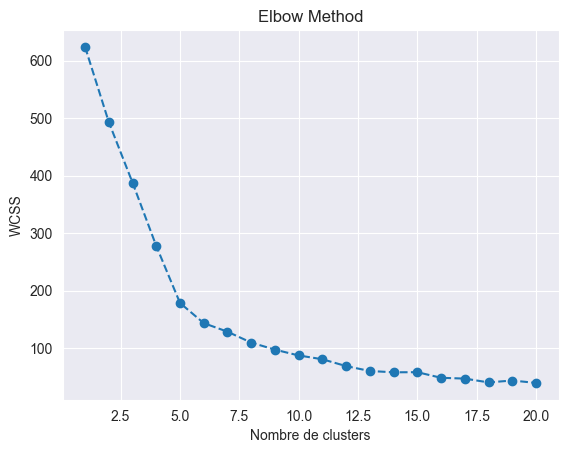

In [265]:
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

On observe que le coude est à 5 clusters. On va donc choisir 5 clusters pour notre modèle.

#### Entrainement du modèle

In [266]:
model = KMeans(5, init='k-means++')
model.fit(df1_cleaned_scaled)

KMeans(n_clusters=5)

In [267]:
clusters = model.predict(df1_cleaned_scaled)
df1_cleaned_Xy['cluster'] = clusters
df1_cleaned_Xy

,Surface Totale,Code postal,Date mutation,Prix/m2,cluster
3647244,96.0,75010.0,738524,47500.000000,0
3648090,516.0,75019.0,738523,2601.205814,0
3649089,1719.0,75008.0,738545,122.774869,1
3649129,416.0,75019.0,738551,10372.596154,0
3649343,144.0,75019.0,738560,80.555556,0
...,...,...,...,...,...
3726765,802.0,75016.0,738883,29925.187032,4
3726823,191.0,75014.0,738876,28272.251309,4
3726890,115.0,75016.0,738883,10027.826087,4
3726917,747.0,75006.0,738869,62918.340027,1


5. Visualisation des clusters

#### Scree plot

In [270]:
pca = PCA(n_components=0.95) # 95% de la variance expliquée
pca_components = pca.fit_transform(df1_cleaned_scaled)

In [271]:
pca = PCA(n_components=4)
pca.fit(df1_cleaned_scaled)
df_pca = pca.transform(df1_cleaned_scaled)
df_pca

array([[ 1.14942924e+00, -1.54149384e+00,  4.19671832e-01,
        -1.86168041e-01],
       [-3.83311515e-01, -2.19323890e+00,  3.76050055e-01,
         6.13646403e-01],
       [ 2.57271396e-01, -9.77656015e-01,  1.92365015e+00,
        -7.27633928e-01],
       [-3.68279906e-01, -1.97404560e+00,  1.91236955e-01,
         6.77204354e-01],
       [-3.60306903e-01, -2.01600880e+00, -1.18714447e-01,
         5.60758117e-01],
       [-3.76490305e-01, -2.04877967e+00, -1.70859565e-01,
         7.87788421e-01],
       [-2.77941833e-01, -1.78247070e+00,  3.85466097e-02,
         5.27704394e-01],
       [ 1.16467230e+00, -1.08772857e+00,  3.64983637e-01,
        -5.10155448e-01],
       [ 8.02344956e+00,  2.39262153e+00,  1.69124169e+00,
         7.63983453e+00],
       [-1.82985671e-01, -1.58719792e+00,  4.75047190e-01,
         5.78048023e-01],
       [ 2.11759116e+00, -1.88547569e-01,  7.14814718e-01,
        -1.03627673e+00],
       [ 1.67855132e+00, -3.69415137e-01,  9.09206642e-01,
      

In [272]:
explained_variance = pca.explained_variance_ratio_

Text(0, 0.5, 'Variance Expliquée cumulées')

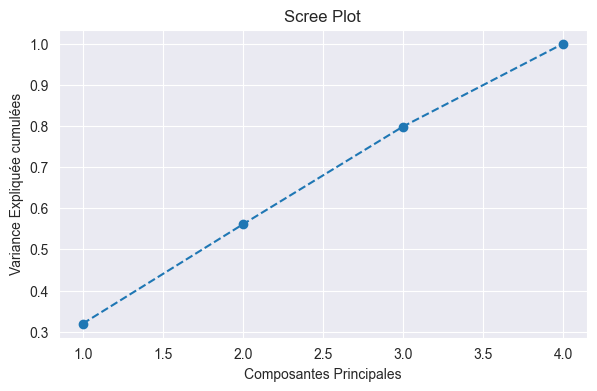

In [278]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée cumulées')

<Axes: >

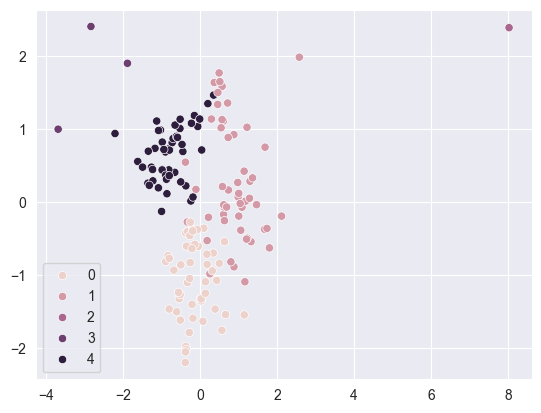

In [307]:
pca = PCA(n_components=3).fit(df1_cleaned_scaled)
projected = pca.transform(df1_cleaned_scaled)

La fonction suivante permet d'afficher les cercles des corrélations des variables avec les axes du plan factoriel. [GitHub](https://github.com/formasys/clustering/blob/main/crime_usa.ipynb)

In [329]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if xmin <= x <= xmax and ymin <= y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
			
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
		
            plt.show(block=False)
		

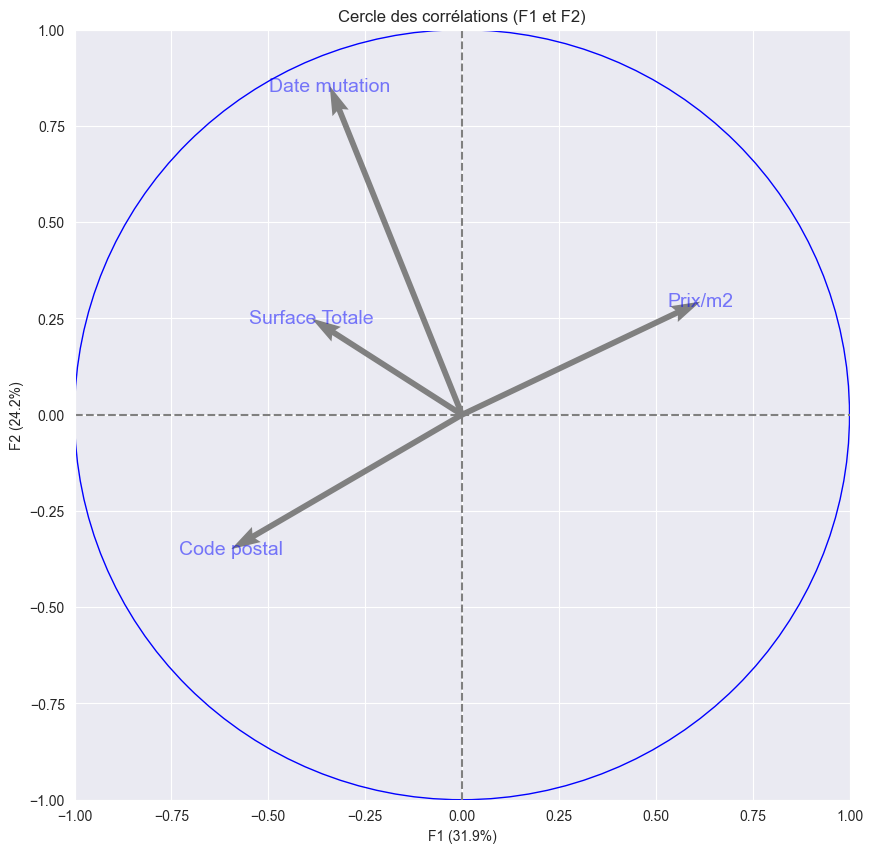

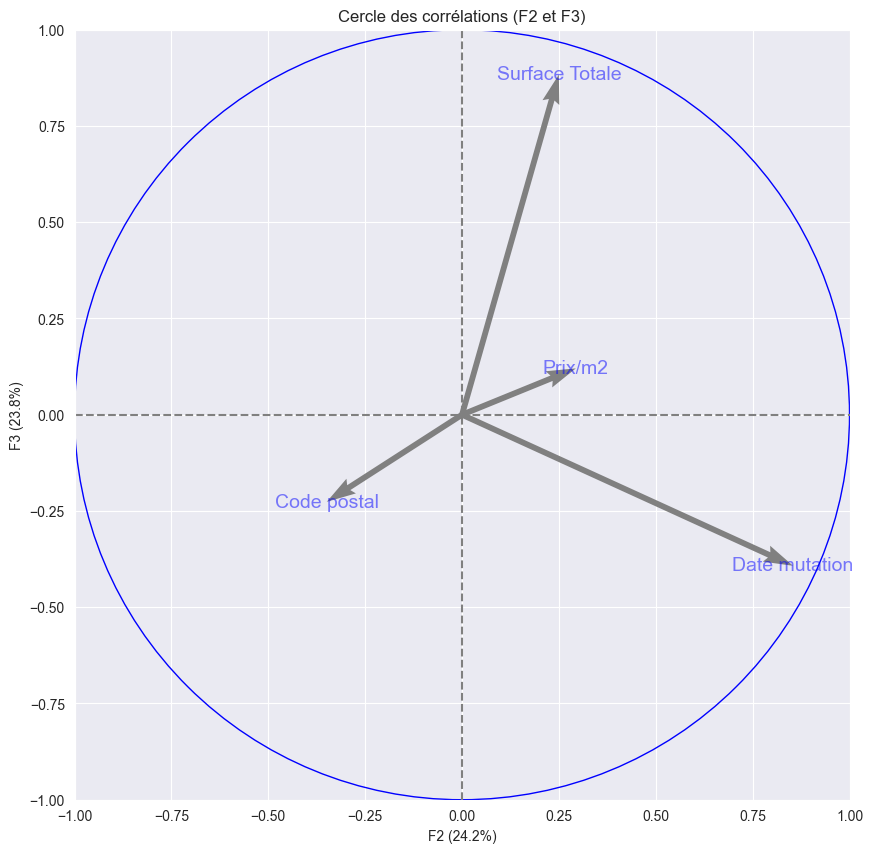

In [330]:
display_circles(pca.components_, 3, pca, [(0,1), (1,2), (2,3)], labels=np.array(df1_cleaned_scaled.columns))

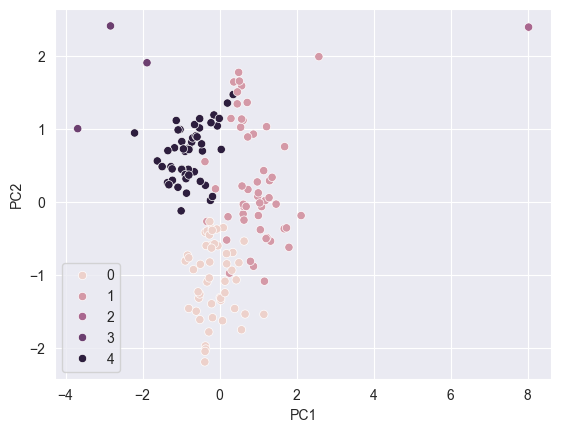

In [324]:
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

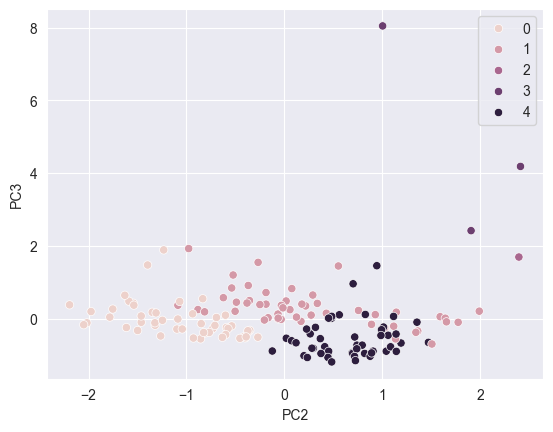

In [327]:
sns.scatterplot(x=projected[:, 1], y=projected[:, 2], hue=clusters)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

## Apprentissage supervié - Régression linéaire

On utilsera la surface totale, la nature de la mutation, et l'arrondissement pour prédire la valeur foncière d'un appartement.

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [134]:
df1_cleaned_with_dates['Date mutation'] = Dates
df1_cleaned_with_dates

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3647244,2023-01-04,3,4560000.0,35,17,75010.0,75,110,0,18,79,2,0.0,0.0,3,0,96.0,96.0
3648090,2023-01-03,3,1342222.2,104,17,75019.0,75,119,0,8,12,2,0.0,0.0,3,0,516.0,516.0
3649089,2023-01-25,3,211050.0,84,17,75008.0,75,108,0,34,11,2,0.0,0.0,3,0,1719.0,1719.0
3649129,2023-01-31,3,4315000.0,24,1,75019.0,75,119,0,19,24,2,0.0,0.0,3,0,416.0,416.0
3649343,2023-02-09,3,11600.0,8,17,75019.0,75,119,0,0,18,2,0.0,0.0,3,0,144.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726765,2023-12-29,3,24000000.0,22,1,75016.0,75,116,0,132,36,2,0.0,0.0,3,0,802.0,802.0
3726823,2023-12-22,3,5400000.0,182,1,75014.0,75,114,0,62,101,2,0.0,0.0,3,0,191.0,191.0
3726890,2023-12-29,3,1153200.0,76,17,75016.0,75,116,0,42,74,2,0.0,0.0,3,0,115.0,115.0
3726917,2023-12-15,3,47000000.0,4,17,75006.0,75,106,0,33,94,2,0.0,0.0,3,0,747.0,747.0


In [135]:
# drop des ligne avec des valeurs foncières extrêmes et prend que type local appartement (2)
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Code type local'] == 2]
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Valeur fonciere'] < 700000000]
df1_cleaned_with_dates['Date mutation'] = df1_cleaned_with_dates['Date mutation'].apply(lambda x: x.toordinal())

df1_cleaned_with_dates

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Totale
3647244,738524,3,4560000.0,35,17,75010.0,75,110,0,18,79,2,0.0,0.0,3,0,96.0,96.0
3648090,738523,3,1342222.2,104,17,75019.0,75,119,0,8,12,2,0.0,0.0,3,0,516.0,516.0
3649089,738545,3,211050.0,84,17,75008.0,75,108,0,34,11,2,0.0,0.0,3,0,1719.0,1719.0
3649129,738551,3,4315000.0,24,1,75019.0,75,119,0,19,24,2,0.0,0.0,3,0,416.0,416.0
3649343,738560,3,11600.0,8,17,75019.0,75,119,0,0,18,2,0.0,0.0,3,0,144.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726765,738883,3,24000000.0,22,1,75016.0,75,116,0,132,36,2,0.0,0.0,3,0,802.0,802.0
3726823,738876,3,5400000.0,182,1,75014.0,75,114,0,62,101,2,0.0,0.0,3,0,191.0,191.0
3726890,738883,3,1153200.0,76,17,75016.0,75,116,0,42,74,2,0.0,0.0,3,0,115.0,115.0
3726917,738869,3,47000000.0,4,17,75006.0,75,106,0,33,94,2,0.0,0.0,3,0,747.0,747.0


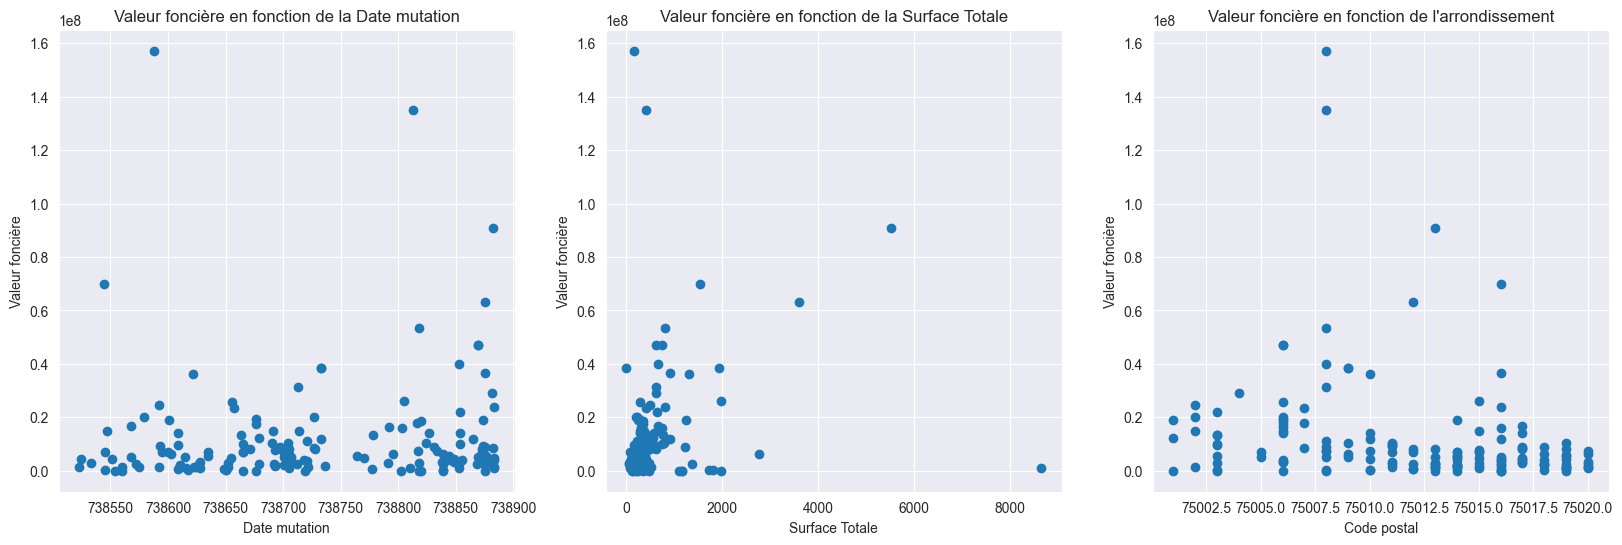

In [136]:
# plot de la valeur foncière en fonction de la date de mutation, l'arrondissement et la surface totale
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].scatter(df1_cleaned_with_dates['Date mutation'], df1_cleaned_with_dates['Valeur fonciere'])
ax[0].set_xlabel('Date mutation')
ax[0].set_ylabel('Valeur foncière')
ax[0].set_title('Valeur foncière en fonction de la Date mutation')

ax[1].scatter(df1_cleaned_with_dates['Surface Totale'], df1_cleaned_with_dates['Valeur fonciere'])
ax[1].set_xlabel('Surface Totale')
ax[1].set_ylabel('Valeur foncière')
ax[1].set_title('Valeur foncière en fonction de la Surface Totale')

ax[2].scatter(df1_cleaned_with_dates['Code postal'], df1_cleaned_with_dates['Valeur fonciere'])
ax[2].set_xlabel('Code postal')
ax[2].set_ylabel('Valeur foncière')
ax[2].set_title('Valeur foncière en fonction de l\'arrondissement')

plt.show()

In [148]:
X = df1_cleaned_with_dates[['Surface Totale', 'Code postal', 'Date mutation']]
y = df1_cleaned_with_dates['Valeur fonciere']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [151]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on training set : {mse_train}')
print(f'Mean Squared Error on test set : {mse_test}')

print(f'Coefficients : {model.coef_}')
print(f'Intercept : {model.intercept_}')

Mean Squared Error on training set : 436537245251781.6
Mean Squared Error on test set : 125303927341552.97
Coefficients : [   5195.07740457 -973115.69544753   13840.51318591]
Intercept : 62780583897.79356


Text(0.5, 1.0, 'Valeur foncière réelle en fonction de la valeur foncière prédite')

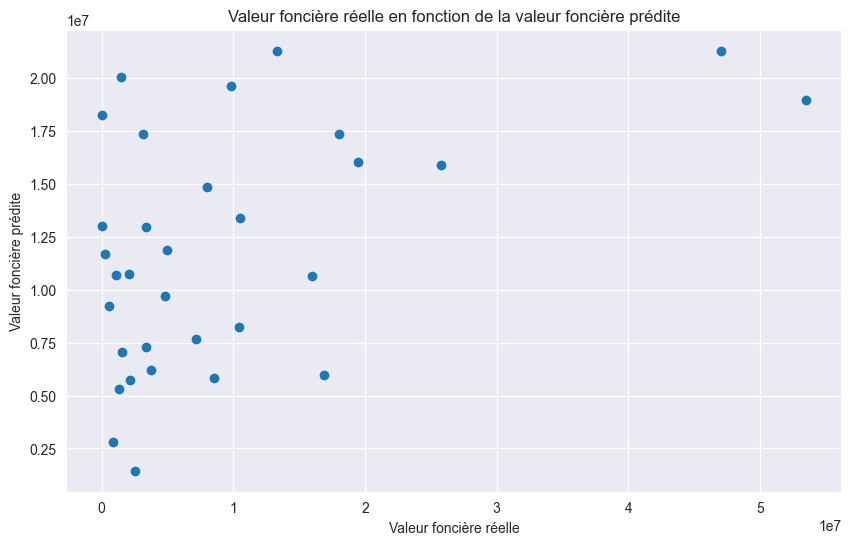

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Valeur foncière réelle')
plt.ylabel('Valeur foncière prédite')
plt.title('Valeur foncière réelle en fonction de la valeur foncière prédite')